<a href="https://colab.research.google.com/github/fahadsultan/csc343/blob/main/programming_assignments/PA_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 10</h1>
<h1>BACK PROPAGATION</h1>
</center>

<br/>
<hr/>
<br/>

<center>

<a href="https://www.quantamagazine.org/brain-bursts-can-mimic-famous-ai-learning-strategy-20211018/"><img width="80%" style="float:left" src="https://d2r55xnwy6nx47.cloudfront.net/uploads/2021/10/branbackprop_2880x1620_lede.jpg"></a> 

<center>

<br/>
<hr/>
<br/>

## Imports

In [ ]:
import pandas as pd 
import numpy  as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm 
%matplotlib inline

## Reading Data

In [ ]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')

In [ ]:
river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv', index_col = 0)
river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina', 'North Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

## Plotting Data

In [ ]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

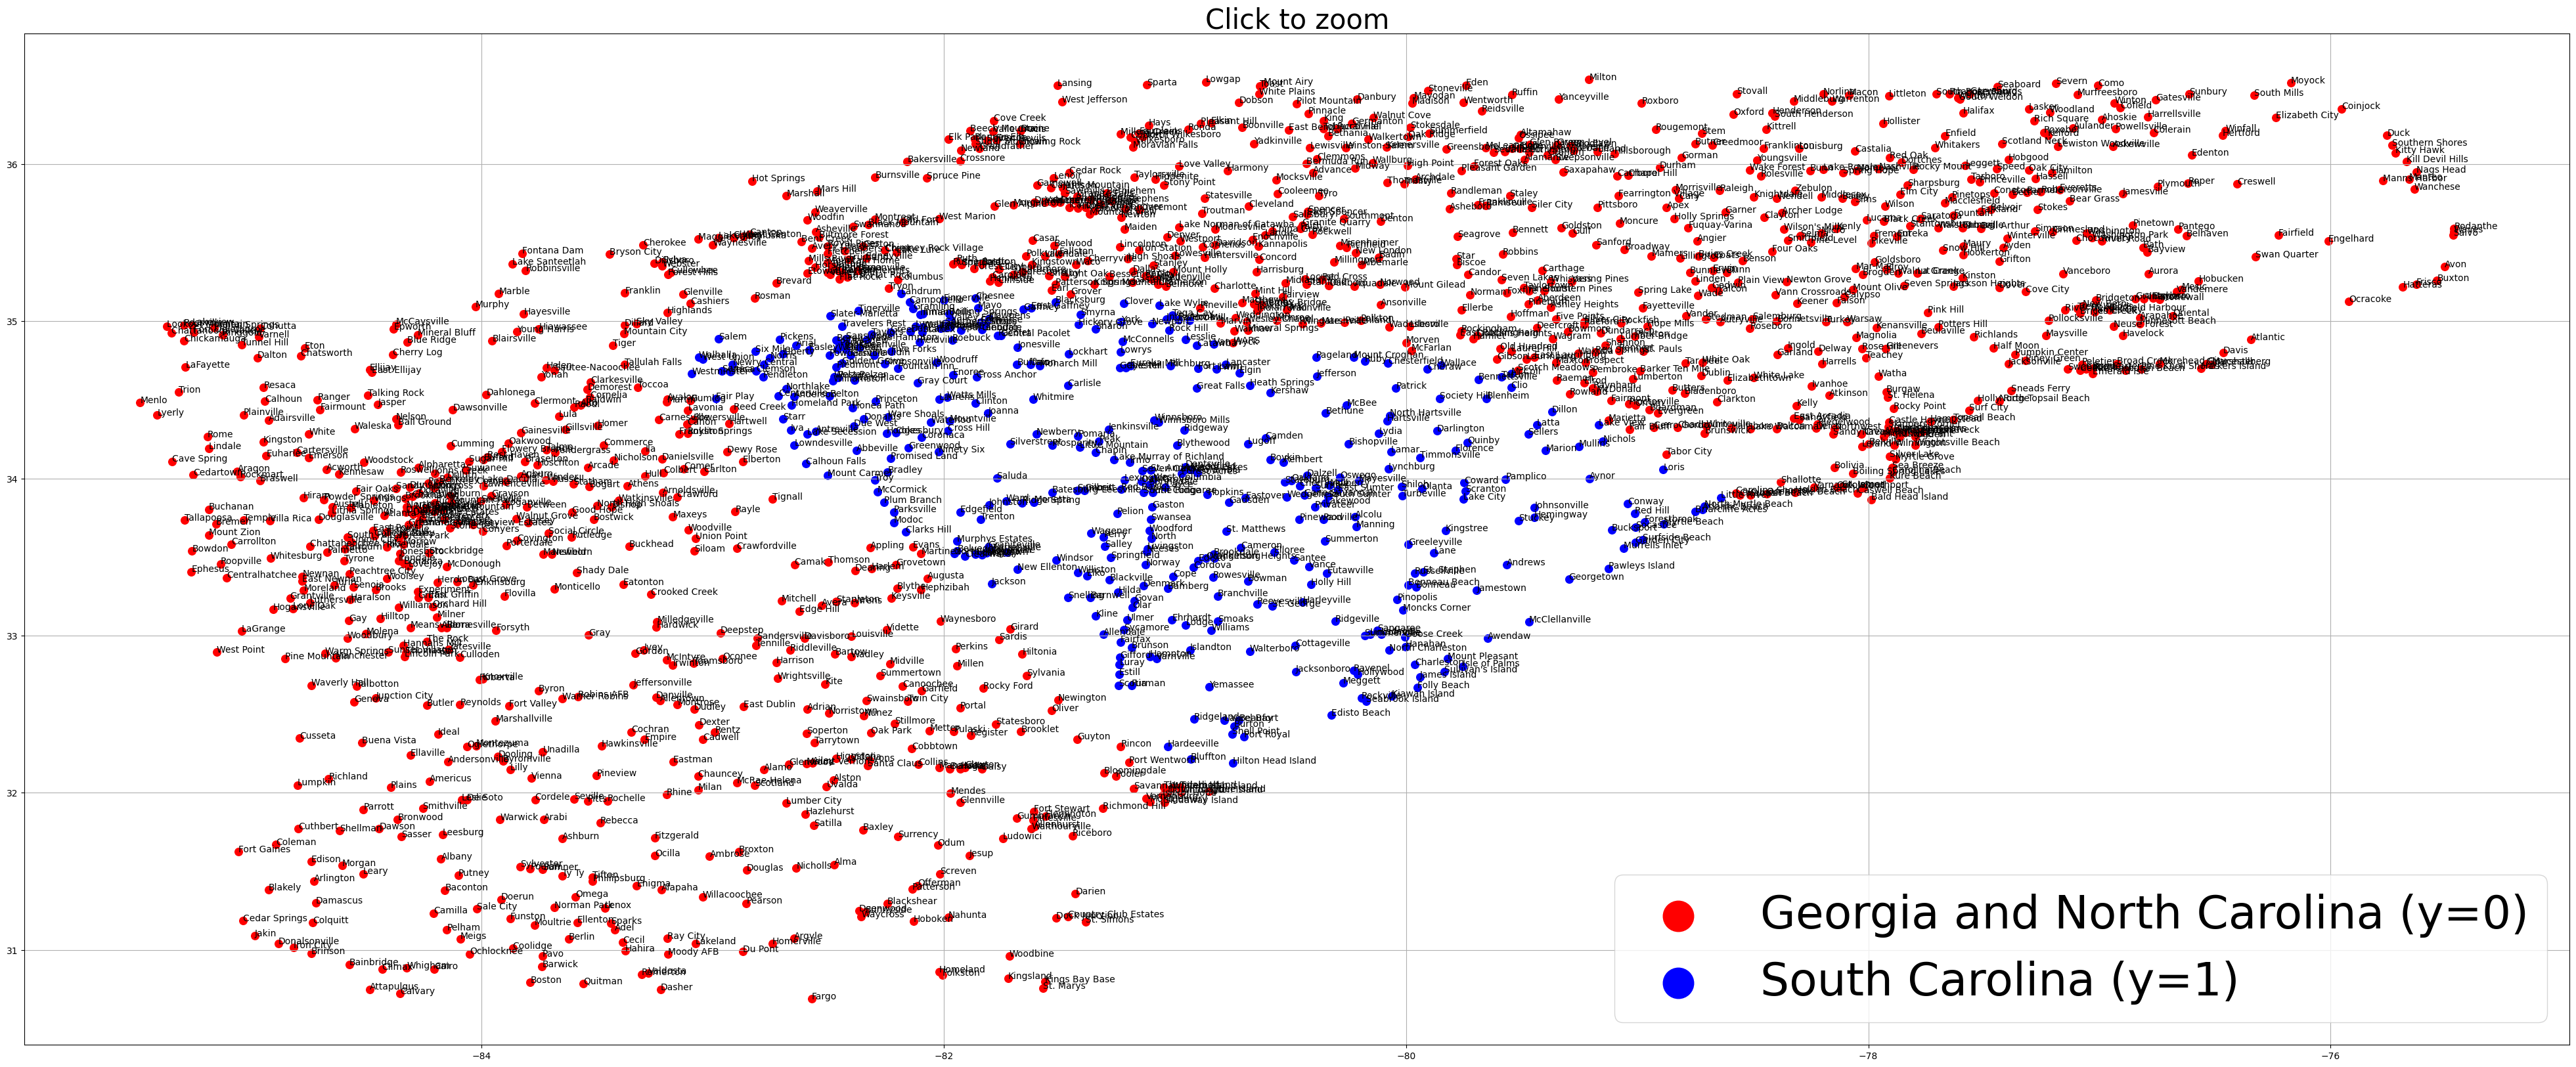

In [ ]:
plot_data(X, y, title='Click to zoom')

# plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

plt.legend(['Georgia and North Carolina (y=0)', 'South Carolina (y=1)'], fontsize=50, markerscale=4);

# Normalize data

In [ ]:
X = X.apply(lambda x: (x-x.mean()) / x.std())
X[0] = 1 

<br/>
<hr/>
<br/>

## Question 1. 

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set. 


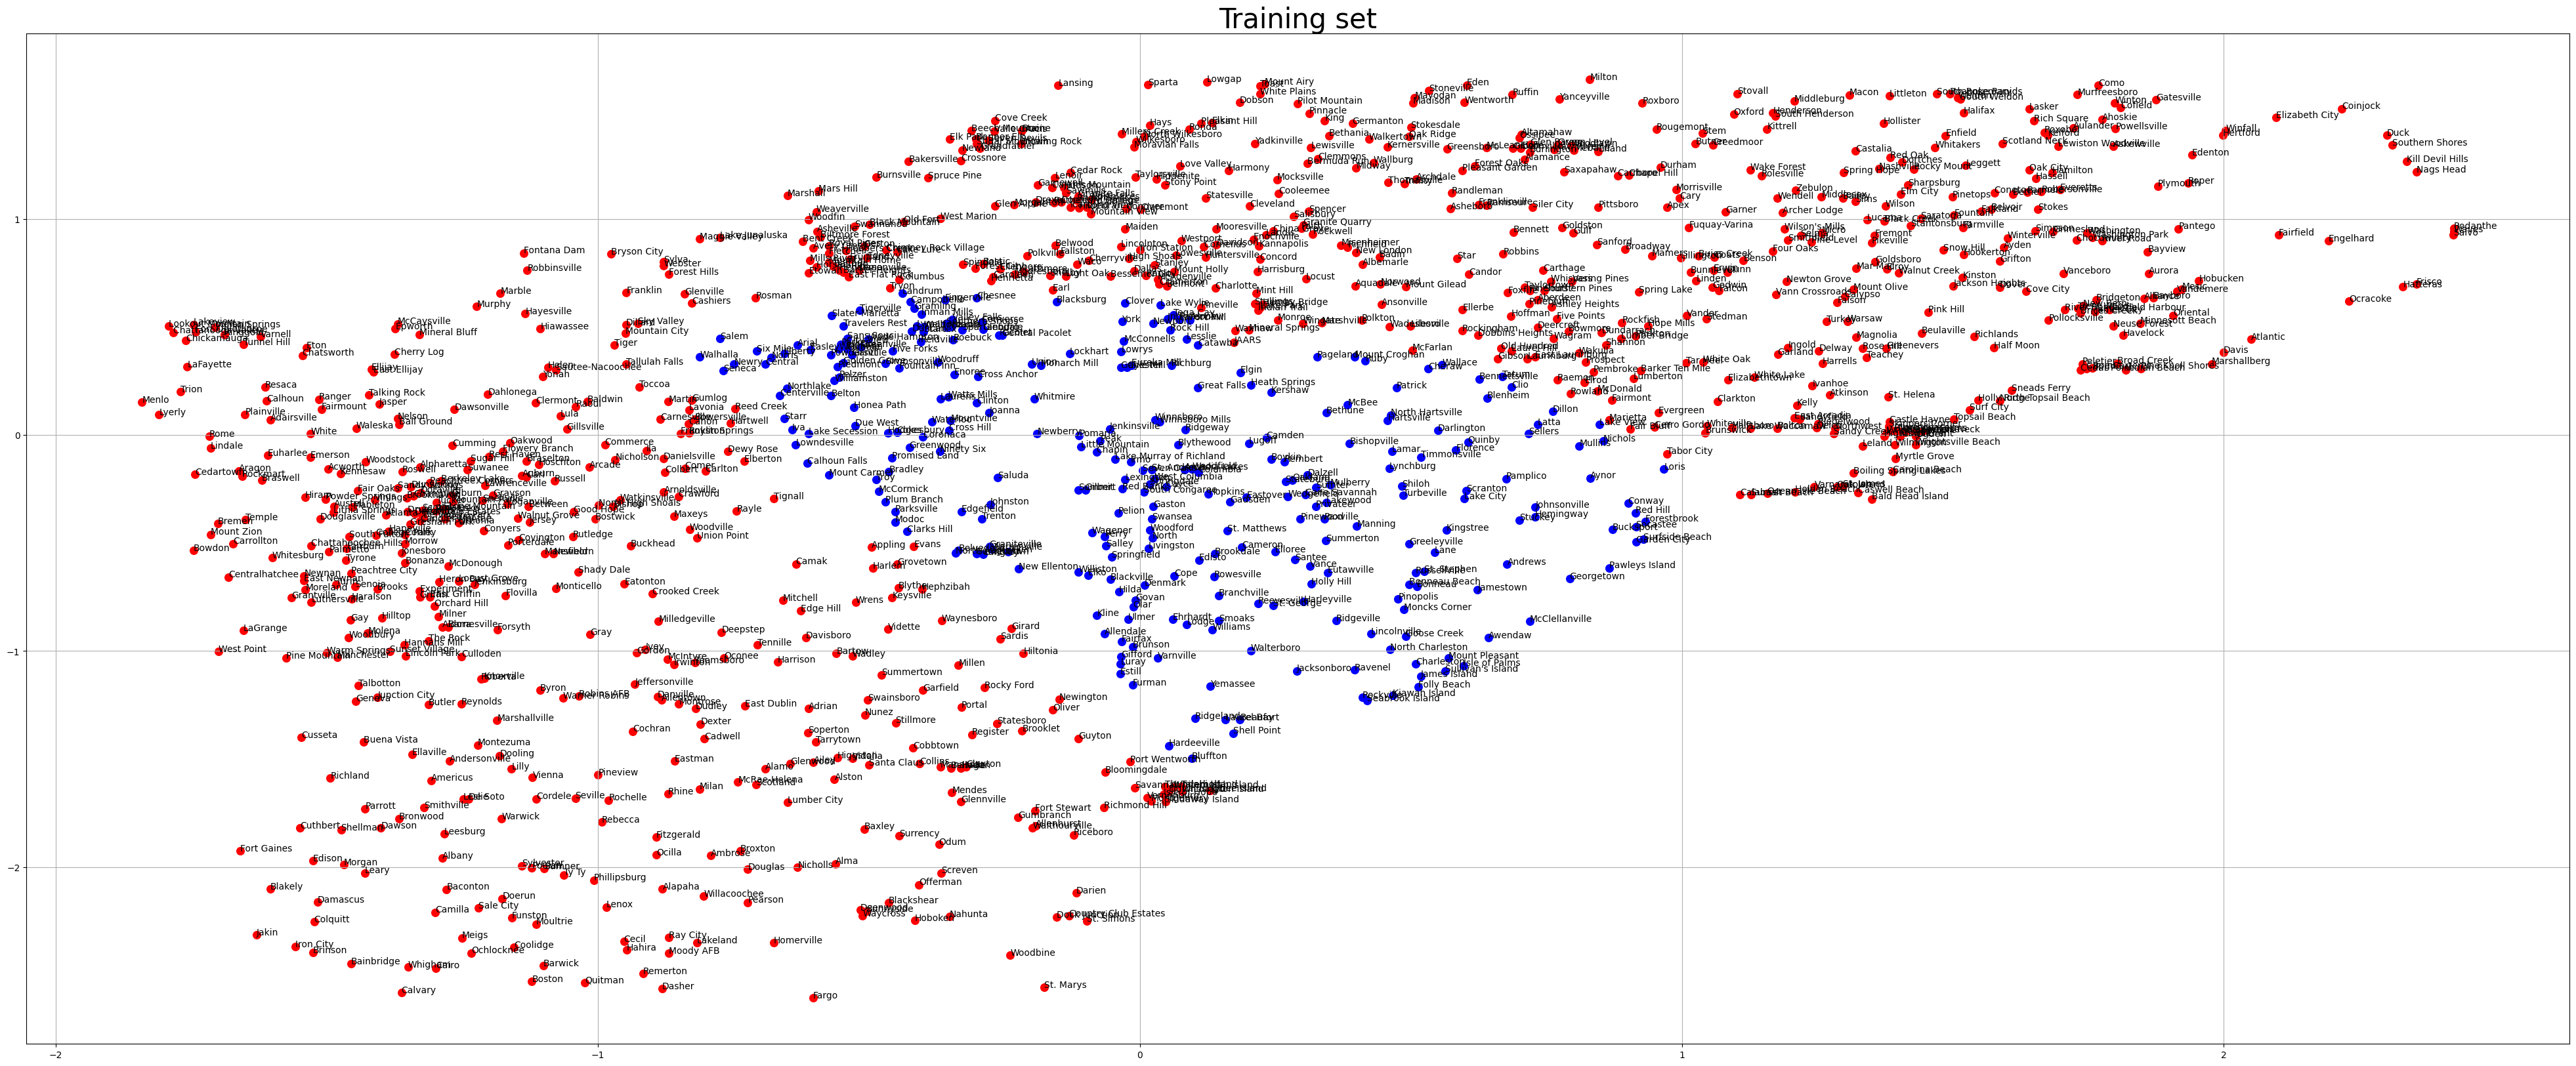

<Figure size 640x480 with 0 Axes>

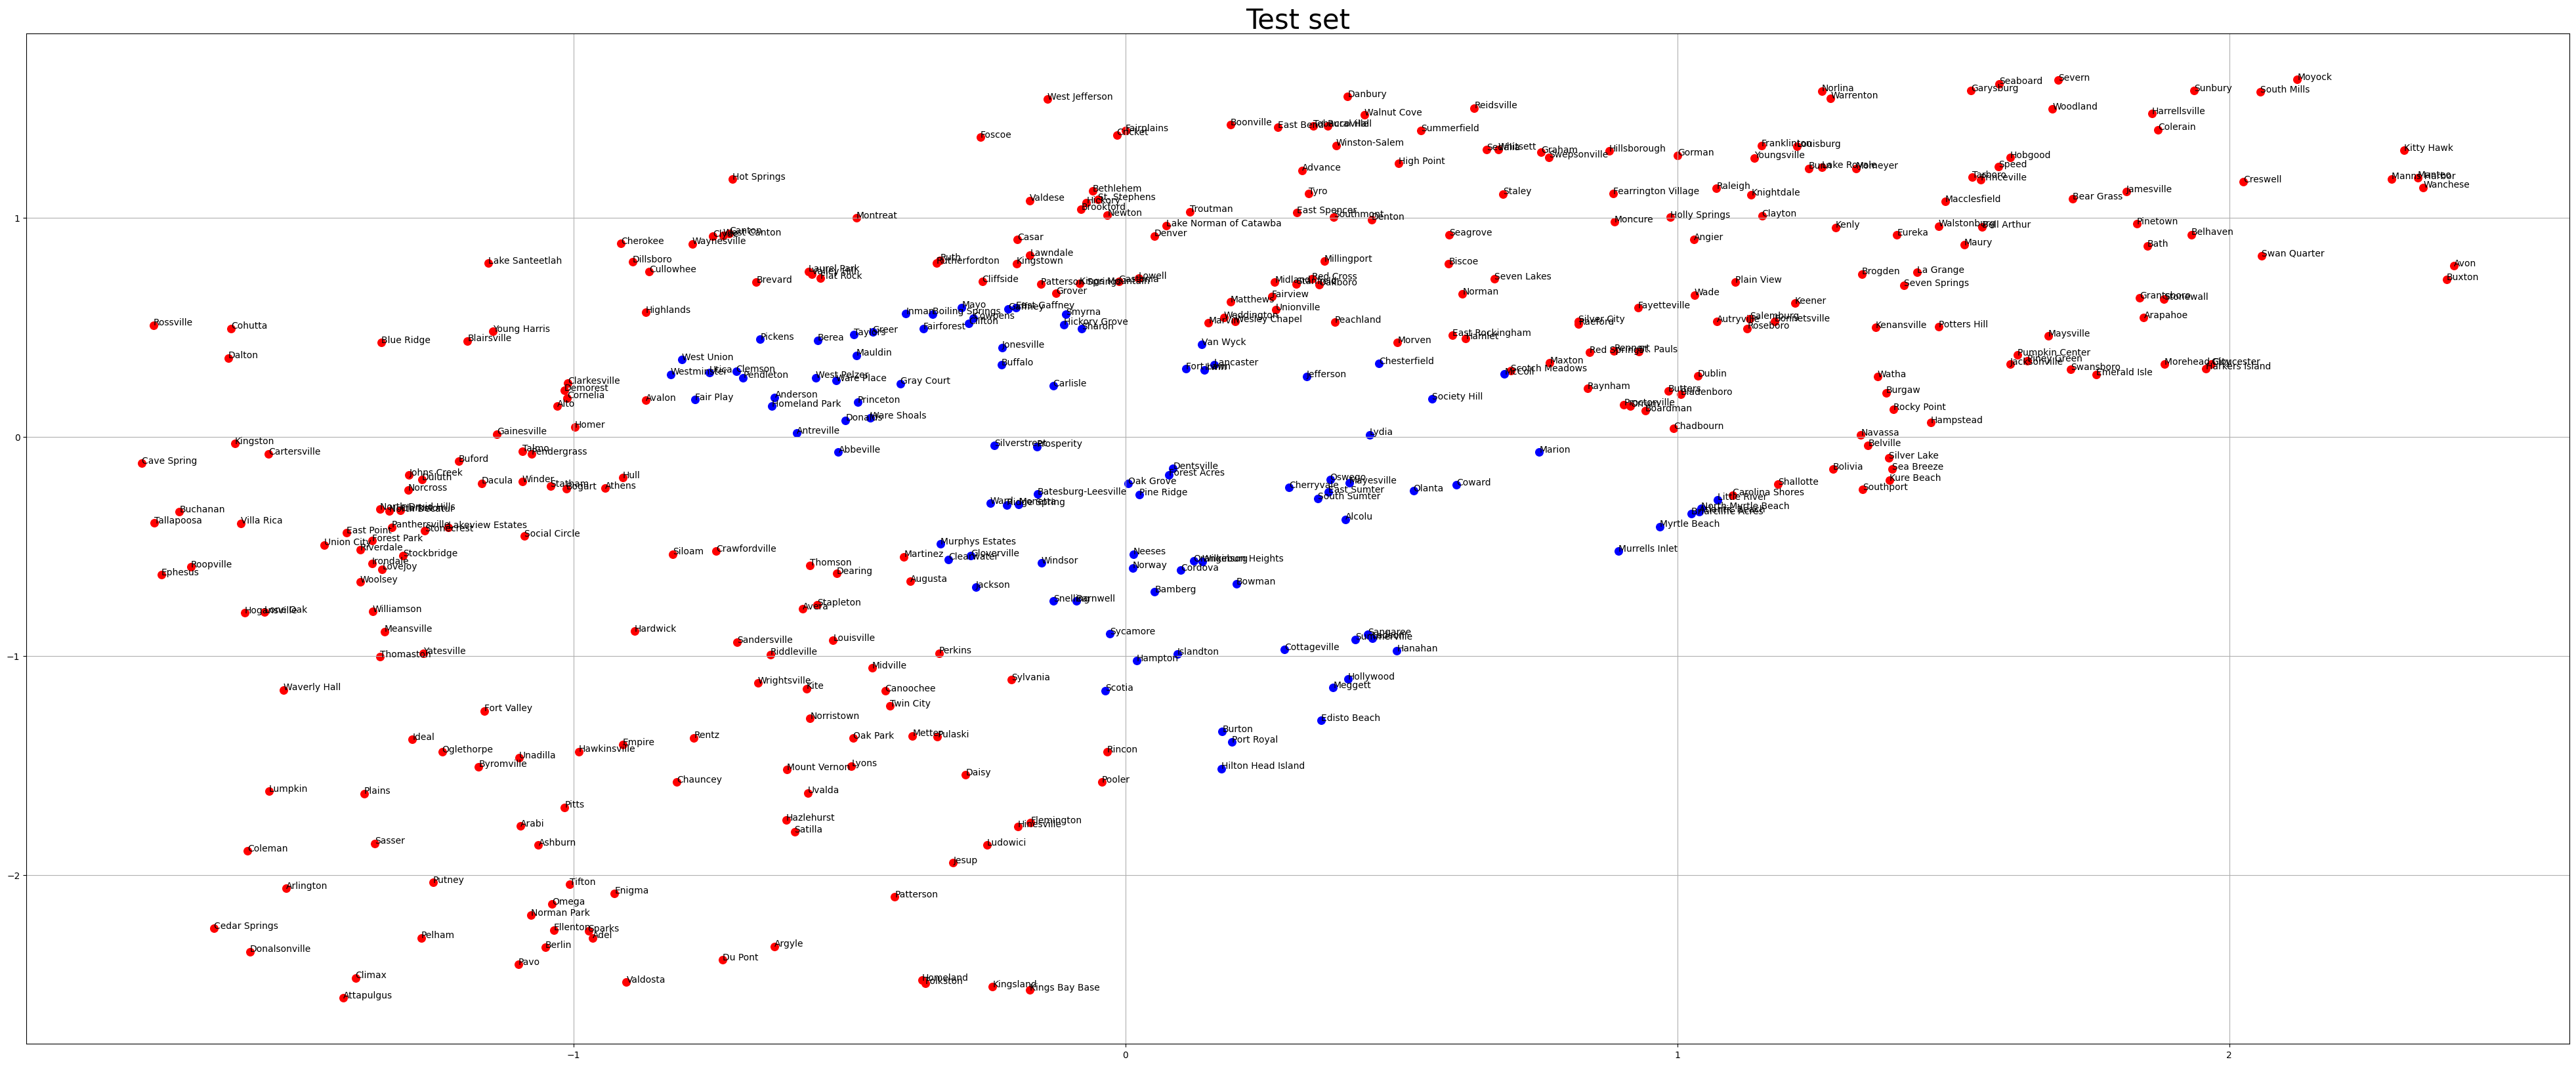

In [ ]:
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

plot_data(X_train, y_train, "Training set");
plt.figure();
plot_data(X_test, y_test, "Test set");

<br/>
<hr/>
<br/>

# Question 2. 

Implement the **Backpropagation** algorithm to learn a complex decision boundary that decides if a given city is in South Carolina or not. 

<br/>

<b>Use as many hidden layers as you like. Each of your hidden layers can have any number of neurons. </b>

<br/>
<!-- <img width="80%" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/backprop_2layers.png"> -->
<!-- 
Your code should take as **inputs**: 

1. Data $~(\mathbf{X}$, $\mathbf{y}$)

  * where $\mathbf{X}_i$ represents (Longitude, Latitude) of $i^{th}$ city
  * $\mathbf{y}_i$ is $1$ if state of $i^{th}$ city is South Carolina and $0$ otherwise

2. Learning rate $~\alpha$
3. Max iterations $~\text{epoch}$

and returns as **output**: 

* A matrix of weights $\mathbf{W}$ of dimensions ($\text{epoch} \times 3) $ where value $\mathbf{W}_{i, j}$ represents weight $w_j$ at epoch $i$.

    * That is, `len(weights) == epoch` _and_ `len(weights[0]) == 3`
\  -->

ONLY USE <u>TRAIN SET</u> FOR LEARNING! 

<br/>
<hr/>
<br/>

# Question 3. Plot weights

Plot the evolution of weights during the learning process

<br/>
<hr/>
<br/>

# Question 4. 

Compute Precision, Recall, F1-score for the <b><u>Training Data</u></b>

\

1. Precision 
$$ \text{precision} = \frac{TP}{TP+FP}$$

2. Recall
$$ \text{recall} = \frac{TP}{TP+FN}$$
3. F1-score 
$$ \text{F$_1$} = 2 \cdot \frac{precision \cdot recall}{precision+recall}$$

<br/>
<hr/>
<br/>

# Question 5. Compute score for test set

Evaluate your logistic regression model on the <u>**test set**</u> using the following evaluation metrics: 

1. Recall 
2. Precision 
3. F1-score 

<br/>
<hr/>
<br/>

<center><br/>

<a href="https://www.science.org/content/article/want-convince-someone-you-re-human-one-word-could-do-trick"><img width="50%" src="https://www.science.org/do/10.1126/science.aav4876/full/SS2862476-1280x720.jpg"></a>
 
</center>


<br/>
<hr/>
<br/>